#### This data is gathered from the twitter api for a page called "WeRateDogs(R)" on twitter with the handle @dog_rates. 

I will be working with three datasets:
* `tweet_information` that has api data that was sent to Udacity upon request from WeRateDogs, because I couldn't gain access to twitter api.
* `image_predictions`: made by reading the `image-predictions.tsv` file downloaded from course resources. The instructor used a machine learning model to produce these predictions.
* `enhanced_archive`: by reading the `enhanced-twitter-archive.csv` that was provided by course instructors.

Dogs are categorized into four groups: doggos, floofers, puppers, and puppos, according to age and characters.

Gathering, assessing, cleaning, then analyzing and vizualizing the data will be documented below.

#### The next cell does the first step for data gathering. It collects the json string from the `'tweet-json.txt'` file then dumps it into another file `"tweet_clean.json"` for future use.

#### After that, it loads the json file into the variable `data`.

In [7]:
import  json
import pandas as pd
import numpy as np
import re
import os

# First we read the tweet-json.txt file and save it into 'tweet_clean.json'
data = [json.loads(line) for line in open('tweet-json.txt', 'r')]
with open('tweet_clean.json', 'w') as f:
    json.dump(data, f)

#After that, we read the json data in 'tweet-json.txt'
with open('tweet_clean.json', 'r') as f:
    data = json.load(f)

In [8]:
#To display all text for every variable in a dataframe
pd.set_option('display.max_colwidth', None)

### This code is to discover where each piece of data lies inside the twitter api.

In [9]:
# This code is to discover where each piece of data lies.
print("This is the tweet id; it is in the id_str key: \n", data[0]['id_str'], "\n")
print("These are the data keys: \n", data[0].keys(), "\n")
print("These are the keys in the entities dictionary: \n", data[0]['entities'].keys(), "\n")
print("These are the keys in the urls dictionart in the entities dictionary: \n", data[200]['entities']['urls'], "\n")
print("The source key has this data: \n", data[0]['source'], "\n")
print("The favorited key has this data: \n", data[0]['favorited'], "\n")
print("This is how many times the tweet was liked: \n", data[0]['favorite_count'], "\n")
print("This is how many times the tweet was retweeted: \n", data[0]['retweet_count'], "\n")
print("This is the IMAGE id; it is in the entities media: \n", data[0]['entities']['media'][0]['id'], "\n")
print("This is the image url for the tweet: \n", data[0]['entities']['media'][0]['media_url'], "\n")
#print(type(data[0]['entities']))
print("The url to the tweet is produced like this: \n", ("https://twitter.com/dog_rates/status/" + data[0]['id_str']).strip(" "), "\n")


This is the tweet id; it is in the id_str key: 
 892420643555336193 

These are the data keys: 
 dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang']) 

These are the keys in the entities dictionary: 
 dict_keys(['hashtags', 'symbols', 'user_mentions', 'urls', 'media']) 

These are the keys in the urls dictionart in the entities dictionary: 
 [] 

The source key has this data: 
 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a> 

The favorited key has this data: 
 False 

This is how many times the tweet was liked: 
 39467 

This is how many times the t

In [10]:
# If we needed to extract media_urls, we can use the following code:
# Create line_list to append the media_urls to
# for line in data:
    #line_list.append(line['entities']['media'][0]['media_url'])
    
# Note that there is a separate column for entities in the api data gathered by the instructor.
# In case we want to access that data, we can use a for loop:
# for element in enhanced_archive: media_url is inside element['media'][0]['media_url']

* `id_str`: This is the `tweet_id` in string form

* `created_at`: This is the timestamp variable in the `twitter_archive_enhanced.csv` file.

* `source`: This is the source variable, don't know what it is for

* `full_text`: This is the full text of the tweet

* `expanded_urls`: the tweet url: this is found in the `entities` key in the json file.

* `media_url`: this is the image url; it is found in `line_of_data['entities]['media'][0]['media_url']`

* `place`: place of the tweet or dog?

* `retweet_count`: how many times the tweet was retweeted

* `favorite_count`:

* `favorited`: the tweet favorited or not 


### Next, we read in the data from our 3 sources.

In [11]:
#I downloaded the data gathered from the twitter api via the link in the supporting material section. 
#Then extracted a json object from it and named it 'tweet_clean.json'
tweet_information = pd.read_json('tweet_clean.json')

In [12]:
#Read the contents of the tsv file into a dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [13]:
enhanced_archive = pd.read_csv('twitter-archive-enhanced.csv')

## Assessment (This was written after assessment using the methods below)
* Unwanted columns
    (1) 4 `dog_type` columns could be presented in one.
    (2) 9 columns in the predictions table; also can be in one column.
* `id` in `tweet_information`. Wrong name. Should be `tweet_id`.
* `tweet_id` in all columns should be a string.
* Media_url not found for some pictures. 
* Source not extracted 
* Some rows don't have jpg_url (called `media_url` in the entities column data)
* Source column is hard to read
* `dog_stage` column (to be produced) has empty strings that need to be converted into null values.

#### Notes:
* Gather media_urls from entities column by creating an empty list first then: 
* using regex; 'Twitter for iPhone' for example. This can be done using the capture statement `"(\w+)</a>$"` OR AN IF STATEMENT INSIDE A LOOP that uses `df.itertuples()` function. 

### Assess by using pandas dataframe functions: `head, info, duplicated, etc`.

In [14]:
tweet_information.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http:/

In [15]:
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
enhanced_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [17]:
enhanced_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
tweet_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
list(tweet_information)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [21]:
enhanced_archive[enhanced_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [22]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [23]:
tweet_information[tweet_information.id.duplicated()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


In [24]:
enhanced_archive.rating_denominator.value_counts(ascending=False)

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
# Then we want to find all denominators that are not equal to 10 and put them in a separate dataframe
unusual_denominators = enhanced_archive[enhanced_archive.rating_denominator != 10]

In [26]:
# To see the text inside each of the tweets that have ratings with unusual denominators, we use a for loop
line_number = 0
for tweet in unusual_denominators['text']:
    line_number += 1
    print(line_number, ') ', tweet, '\n', sep='')

1) @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

2) @docmisterio account started on 11/15/15

3) The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

4) Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

5) RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…

6) Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

7) After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

8) Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv

9) Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a

10) This

* #### I noticed that tweet number 2 has no ratings. 

* **We clean the URLs issue by doing the following:**

In [27]:
# Next, we check if the urls for some tweets are missing; if the url is not present, we add the 
# indices into a list and print some details
no_url_list = list()

for tweetid in enhanced_archive.tweet_id:
    url = enhanced_archive.loc[enhanced_archive['tweet_id'] == tweetid].expanded_urls.to_string()
    if 'http' not in url:
        no_url_list.append(url)
    
print(no_url_list)
print("\nThere are {} tweets with no url.".format(len(no_url_list)))
print("Notice that each item of the list has the index of the row it is in.")

['30    NaN', '55    NaN', '64    NaN', '113    NaN', '148    NaN', '179    NaN', '185    NaN', '186    NaN', '188    NaN', '189    NaN', '218    NaN', '228    NaN', '234    NaN', '274    NaN', '290    NaN', '291    NaN', '313    NaN', '342    NaN', '346    NaN', '375    NaN', '387    NaN', '409    NaN', '427    NaN', '498    NaN', '513    NaN', '570    NaN', '576    NaN', '611    NaN', '701    NaN', '707    NaN', '843    NaN', '857    NaN', '967    NaN', '1005    NaN', '1080    NaN', '1295    NaN', '1345    NaN', '1445    NaN', '1446    NaN', '1474    NaN', '1479    NaN', '1497    NaN', '1523    NaN', '1598    NaN', '1605    NaN', '1618    NaN', '1663    NaN', '1689    NaN', '1774    NaN', '1819    NaN', '1844    NaN', '1895    NaN', '1905    NaN', '1914    NaN', '1940    NaN', '2038    NaN', '2149    NaN', '2189    NaN', '2298    NaN']

There are 59 tweets with no url.
Notice that each item of the list has the index of the row it is in.


In [28]:
# We can access information about any of the tweets that has no url by using the index
# written before NaNs
enhanced_archive.loc[[30, 55, 64, 113]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


* #### We can fix the missing urls by creating a new url using the `tweet_ids` by making a string like this: `new_url = 'https://twitter.com/dog_rates/status/' + tweet_id`.

In [29]:
# After that, let's find out how many values are present in the source column
print("The counts of the values in the source column are:\n", enhanced_archive.source.value_counts())
print("\n\n* We notice there are only four sources, which makes it easier for us to write a for loop to change these values.")

The counts of the values in the source column are:
 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64


* We notice there are only four sources, which makes it easier for us to write a for loop to change these values.


In [30]:
# To check for unusual or incorrect dog names, we do the following:
print(enhanced_archive.name.unique())
print("\nWe notice there are incorrect names like 'all', 'this', 'unacceptable', 'a', and others. All of them start with a lowercase letter.")
print("\nThe incorrect names are:\n", list(enhanced_archive[enhanced_archive.name.str.islower()].name.unique()))
print("\nThe number of rows with incorrect names is {}.".format(len(enhanced_archive[enhanced_archive.name.str.islower()].name)))


['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' 'None' 'Jax' 'Zoey'
 'Cassie' 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus'
 'Canela' 'Gerald' 'Jeffrey' 'such' 'Maya' 'Mingus' 'Derek' 'Roscoe'
 'Waffles' 'Jimbo' 'Maisey' 'Lilly' 'Earl' 'Lola' 'Kevin' 'Yogi' 'Noah'
 'Bella' 'Grizzwald' 'Rusty' 'Gus' 'Stanley' 'Alfy' 'Koko' 'Rey' 'Gary'
 'a' 'Elliot' 'Louis' 'Jesse' 'Romeo' 'Bailey' 'Duddles' 'Jack' 'Emmy'
 'Steven' 'Beau' 'Snoopy' 'Shadow' 'Terrance' 'Aja' 'Penny' 'Dante'
 'Nelly' 'Ginger' 'Benedict' 'Venti' 'Goose' 'Nugget' 'Cash' 'Coco' 'Jed'
 'Sebastian' 'Walter' 'Sierra' 'Monkey' 'Harry' 'Kody' 'Lassie' 'Rover'
 'Napolean' 'Dawn' 'Boomer' 'Cody' 'Rumble' 'Clifford' 'quite' 'Dewey'
 'Scout' 'Gizmo' 'Cooper' 'Harold' 'Shikha' 'Jamesy' 'Lili' 'Sammy'
 'Meatball' 'Paisley' 'Albus' 'Neptune' 'Quinn' 'Belle' 'Zooey' 'Dave'
 'Jersey' 'Hobbes' 'Burt' 'Lorenzo' 'Carl' 'Jordy' 'Milky' 'Trooper'
 'Winston' 'Sophie' 'Wyatt' 'Rosie' 'Thor' 'Oscar' 'Luna' 'Callie'
 'Cermet' 'George

In [31]:
# Let's look up the text of the tweet whose name is assigned to 'mad'
enhanced_archive_mad = enhanced_archive[enhanced_archive['name'] == 'mad']
print(enhanced_archive_mad.text)
print("\nLooks like the text is duplicated. Let's check other variables.")
print("\nThese are the tweet ids for these tweets:\n{}".format(enhanced_archive_mad.tweet_id))
print("\nMaybe one of these was a retweet.")

682     RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX
1095                   Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX
Name: text, dtype: object

Looks like the text is duplicated. Let's check other variables.

These are the tweet ids for these tweets:
682     788552643979468800
1095    736392552031657984
Name: tweet_id, dtype: int64

Maybe one of these was a retweet.


#### Let's find the NAs count for each dataframe.

In [32]:
# Now, let's calculate the number of NA values in each column
nas_count = len(enhanced_archive) - enhanced_archive.count()
print("The numbers of NAs for each column in enhanced_archive is:\n {}".format(nas_count))

The numbers of NAs for each column in enhanced_archive is:
 tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64


In [33]:
nas_count = len(image_predictions) - image_predictions.count()
print("The numbers of NAs for each column in image_predictions is:\n {}".format(nas_count))

The numbers of NAs for each column in image_predictions is:
 tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64


In [34]:
nas_count = len(tweet_information) - tweet_information.count()
print("The numbers of NAs for each column in tweet_information is:\n {}".format(nas_count))

The numbers of NAs for each column in tweet_information is:
 created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive         

## Issues to fix
#### * Dataframes need to be joined
####  * Incorrect data type in the three tables (`tweet_id`). This is a quality issue.

### Tidiness Issues
* `enhanced_archive` table has unwanted columns.
* `enhanced_archive` table has several columns for dog_types where only one should suffice.
* `tweet_information` table has unwanted columns.
* `image_predictions` table has 9 columns predicting the dog_type; one is enough.

### Quality Issues

#### `enhanced_archive` table
* some rows are with no picture url (media_url/jpg_url)
* One tweet is recorded as having a dog rating when it actually doesn't
* Some rating numerators contain decimals in the actual tweet
* Source column is very hard to read
* Some dogs don't have data for dod_stage i.e. puppos, floofers, etc.
* Erroneous data type for the timestamp column (needs to be datetime object).

#### `image_predictions` table
* Dog types sometimes start with capital letters and other times with small letters.

#### `tweet_information` table
* Invalid column name `id`: should be `tweet_id`


## Clean 

### Before cleaning, we create copies of the original dataframes.

In [90]:
enhanced_archive_clean = enhanced_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_information.copy()

### Tidiness issues first

* **Unrequired columns in Enhanced Twitter Archive**

**Define**
Remove unnecessary columns: `['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']`

**Code**

In [91]:
enhanced_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

**Test**

In [92]:
enhanced_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Unwanted columns in `tweet_information` table

**Define**
Drop the unwanted columns

**Code**

In [93]:
list(tweet_info_clean)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [94]:
tweet_info_clean = tweet_info_clean[['id', 'favorite_count', 'retweet_count']]

**Test**

In [95]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


**`twitter_archive` Unwanted dog stage columns, i.e. 'doggo', 'fluffer', etc when one is enough**
**Define**
There are several columns for dog stages, where one will suffice.

**Code**

In [96]:
# We create a column that has dog_names
# We also turn "None" values into empty strings so that we can convert all empty strings into NaNs in the end
enhanced_archive_clean['dog_stage'] = enhanced_archive_clean[['doggo','floofer','pupper','puppo']].replace("None", "").sum(1)

In [97]:
# Then, we drop the unwanted columns
enhanced_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

**Test**

In [98]:
# We display a slice to see if the code worked
print(enhanced_archive_clean.iloc[90:120].dog_stage)
# and it did!

90           
91           
92     pupper
93           
94      puppo
95           
96           
97     pupper
98     pupper
99      doggo
100          
101          
102          
103          
104          
105          
106          
107    pupper
108     doggo
109          
110     doggo
111          
112          
113          
114          
115          
116          
117          
118          
119          
Name: dog_stage, dtype: object


In [99]:
print("The counts of dog stages in the table:\n", enhanced_archive_clean.dog_stage.value_counts())
print("\nLooks like there are a lot of missing values.")

The counts of dog stages in the table:
                 1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

Looks like there are a lot of missing values.


### Convert the 9 columns in `image_predictions` into one.

**Define**

We can iterate through the columns to find which prediction was true, then add its result to the main column.

**Code**

In [100]:
# Create an empty column to attach to it
image_predictions_clean['dog_type'] = np.nan
# Put the dog types into the dog_type column
for row in image_predictions_clean.itertuples():
    if row.p1_dog == True:
        image_predictions_clean.loc[row.Index, 'dog_type'] = image_predictions_clean.loc[row.Index, 'p1']
    elif row.p2_dog == True:
        image_predictions_clean.loc[row.Index, 'dog_type'] = image_predictions_clean.loc[row.Index, 'p2']
    elif row.p3_dog == True:
        image_predictions_clean.loc[row.Index, 'dog_type'] = image_predictions_clean.loc[row.Index, 'p3']

In [101]:
# Drop the unnecessary columns
image_predictions_clean.drop(columns=['jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],inplace=True)

**Test**

In [102]:
image_predictions_clean.head()

,tweet_id,dog_type
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


### Now that we're done with the tidiness issues - Quality issues

#### Tweet Info 'id' instead of 'tweet_id' in `tweet_info_clean`

**Define**

Rename the column to `tweet_id` for it to match the `tweet_id` column in the other two dataframes

**Code**

In [103]:
# Show the column names in tweet_info_clean
list(tweet_info_clean)

['id', 'favorite_count', 'retweet_count']

In [104]:
tweet_info_clean.rename({'id': 'tweet_id'}, axis=1, inplace=True)

**Test**

In [105]:
list(tweet_info_clean)

['tweet_id', 'favorite_count', 'retweet_count']

### Rows with no picture info in `enhanced_archive` table

**Define**

Create urls for the missing values using the tweet ids

**Code**

In [106]:
for tweetid in enhanced_archive_clean.tweet_id:
    url = enhanced_archive_clean.loc[enhanced_archive_clean['tweet_id'] == tweetid].expanded_urls.to_string()
    if 'http' not in url:
        enhanced_archive_clean.loc[enhanced_archive_clean['tweet_id'] == tweetid, 'expanded_urls'] = "https://twitter.com/dog_rates/status/" + str(tweetid)
    

**Test**

In [107]:
enhanced_archive_clean.expanded_urls.isna().sum()

0

### Incorrect dog names: 'a', 'such', 'all', etc in `enhanced_archive`

**Define**

Replace incorrect names (ones that start with a lowercase letter with NaN `np.nan`)



**Code**

In [108]:
len(enhanced_archive_clean[enhanced_archive_clean.name == "None"])

745

In [109]:
enhanced_archive_clean[enhanced_archive_clean.name.str.contains(r'^[a-z]')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
22,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,
56,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,pupper
118,869988702071779329,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,
169,859196978902773760,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,
193,855459453768019968,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x","https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,
...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,
2350,666050758794694657,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,


In [110]:
# Series of incorrect names
incorrect = enhanced_archive_clean[enhanced_archive_clean.name.str.contains(r'^[a-z]')].name
print("These are all the incorrect names:\n", incorrect.unique())
print("\nThere are {} incorrect names.".format(len(incorrect)))

These are all the incorrect names:
 ['such' 'a' 'quite' 'not' 'one' 'incredibly' 'mad' 'an' 'very' 'just' 'my'
 'his' 'actually' 'getting' 'this' 'unacceptable' 'all' 'old'
 'infuriating' 'the' 'by' 'officially' 'life' 'light' 'space']

There are 109 incorrect names.


In [111]:
# Let's replace these values with "None"
enhanced_archive_clean.replace({'name': r'^[a-z].*'}, {'name': 'None'}, regex=True, inplace=True)

In [112]:
# Now, let's change the column name `dog` into `dog_name`
enhanced_archive_clean.rename({'name': 'dog_name'}, axis='columns', inplace=True)

**Test**

In [113]:
# This is the same code as before; it should now print 0 or nothing
# Series of incorrect names
incorrect = enhanced_archive_clean[enhanced_archive_clean.dog_name.str.contains(r'^[a-z]')].dog_name
print("These are all the incorrect names:\n", incorrect.unique())
print("\nThere are {} incorrect names.".format(len(incorrect)))

These are all the incorrect names:
 []

There are 0 incorrect names.


In [114]:
# This code should print the overall number of 'None's in the dog_name column after cleaning
len(enhanced_archive_clean[enhanced_archive_clean.dog_name == "None"])

854

In [115]:
len(enhanced_archive_clean)

2356

### One tweet with no dog rating

**Define**

One of the tweets has a rating of 24/7, which is not a rating.

In [116]:
enhanced_archive_clean.loc[516]

tweet_id                                                                                                                                                                     810984652412424192
timestamp                                                                                                                                                             2016-12-19 23:06:23 +0000
source                                                                                                       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
expanded_urls                                                                               https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1
rating_numerator                        

**Code**

In [117]:
# Drop the row that has this false rating
enhanced_archive_clean.drop(enhanced_archive_clean.index[[516]], inplace=True)

**Test**

In [118]:
numerator_24_7 = enhanced_archive_clean.query('rating_numerator == 24' and 'rating_denominator == 7')
print(numerator_24_7)
print("\n", numerator_24_7.index)
print("\n", enhanced_archive_clean.iloc[516])

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, dog_name, dog_stage]
Index: []

 Int64Index([], dtype='int64')

 tweet_id                                                                                                                                                                                           810896069567610880
timestamp                                                                                                                                                                                   2016-12-19 17:14:23 +0000
source                                                                                                                             <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                                                          This is Hunter. He just found out he needs braces. Requesting an orthodogtist stat. 11/10 you're fine Hunter, everyth

#### DONE! 

**Inaccurate ratings: correct numerators are decimals in `enhanced_twitter_archive`**

**Define**

Some rating numerators contain decimals. We want to change the column into floats, then correctly insert this data after extracting it from the original text.

In [119]:
enhanced_archive_clean[enhanced_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")].rating_numerator

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


45       5
340     75
695     75
763     27
1689     5
1712    26
Name: rating_numerator, dtype: int64

**Code**

In [120]:
# Change the data type for the numerator and denominator columns into floats
enhanced_archive_clean['rating_numerator'] = enhanced_archive_clean['rating_numerator'].astype('float')
enhanced_archive_clean['rating_denominator'] = enhanced_archive_clean['rating_denominator'].astype('float')

In [121]:
enhanced_archive_clean.loc[(enhanced_archive_clean['tweet_id'] == 883482846933004288) & (enhanced_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
enhanced_archive_clean.loc[(enhanced_archive_clean['tweet_id'] == 832215909146226688) & (enhanced_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
enhanced_archive_clean.loc[(enhanced_archive_clean['tweet_id'] == 786709082849828864) & (enhanced_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
enhanced_archive_clean.loc[(enhanced_archive_clean['tweet_id'] == 778027034220126208) & (enhanced_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
enhanced_archive_clean.loc[(enhanced_archive_clean['tweet_id'] == 680494726643068929) & (enhanced_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

**Test**

In [122]:
# Now, the numerators are fixed if we check them
enhanced_archive_clean[enhanced_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")].rating_numerator

45      13.50
340     75.00
695      9.75
763     11.27
1689     5.00
1712    11.26
Name: rating_numerator, dtype: float64

### Incorrect data type for column `tweet_id` in all dataframes

**Define**

The tweet_id in all columns is type `int64`. It should be in string form.

**Code**

In [123]:
enhanced_archive_clean['tweet_id'] = enhanced_archive_clean['tweet_id'].astype(str)

In [124]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

In [125]:
tweet_info_clean['tweet_id'] = tweet_info_clean['tweet_id'].astype(str)

**Test**

In [126]:
enhanced_archive_clean.dtypes

tweet_id               object
timestamp              object
source                 object
text                   object
expanded_urls          object
rating_numerator      float64
rating_denominator    float64
dog_name               object
dog_stage              object
dtype: object

In [127]:
image_predictions_clean.dtypes

tweet_id    object
dog_type    object
dtype: object

In [128]:
tweet_info_clean.dtypes

tweet_id          object
favorite_count     int64
retweet_count      int64
dtype: object

**Correction DONE!**

### Source column hard to read¶

#### `enhanced_archive` source column is hard to read

***Define***

The source column shows information in a format that is hard to read. The important information can be extracted and shown more clearly.

***Code***

In [129]:
# Create a new column to attach to it
enhanced_archive_clean['source_'] = np.nan
# Put the dog types into the dog_type column
for row in enhanced_archive_clean.itertuples():
    if "Twitter for iPhone" in row.source:
        enhanced_archive_clean.loc[row.Index, 'source_'] = "Twitter for iPhone"
    elif 'Twitter Web Client' in row.source:
        enhanced_archive_clean.loc[row.Index, 'source_'] = 'Twitter Web Client'
    elif 'Vine - Make a Scene' in row.source:
        enhanced_archive_clean.loc[row.Index, 'source_'] = 'Vine - Make a Scene'
    elif 'TweetDeck' in row.source:
        enhanced_archive_clean.loc[row.Index, 'source_'] = 'TweetDeck'


In [130]:
enhanced_archive_clean.drop(columns=['source'], inplace=True)
enhanced_archive_clean.rename({'source_': 'source'}, axis='columns', inplace=True)

#### *Test*

In [131]:
enhanced_archive_clean.source.value_counts()

Twitter for iPhone     2220
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [132]:
enhanced_archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [133]:
# This will print the same number as in the value_counts function above
len(enhanced_archive_clean[enhanced_archive_clean.source == 'Vine - Make a Scene'])

91

### Not all dog types are upper case

#### In `image_predictions` table

***Define***

Capitalize the dog names

***Code***

In [134]:
# Create an empty column first
image_predictions_clean['dog_capital'] = np.nan
# Change the NaN values in the new column
for row in image_predictions_clean.itertuples():
    image_predictions_clean.loc[row.Index, 'dog_capital'] = str(row.dog_type).title()

In [135]:
# Drop the original column and rename the new column
image_predictions_clean.drop(columns=['dog_type'], inplace=True)
image_predictions_clean.rename({'dog_capital': 'dog_type'}, axis=1, inplace=True)

***Test***

In [136]:
image_predictions_clean.head(2)

,tweet_id,dog_type
0,666020888022790149,Welsh_Springer_Spaniel
1,666029285002620928,Redbone


### There are empty strings in the `dog_stage` column in `enhanced_archive_clean`

***Define***

We want to replace the empty strings with 'None'

In [137]:
enhanced_archive_clean.dog_stage[8:20]

8          
9     doggo
10         
11         
12    puppo
13         
14    puppo
15         
16         
17         
18         
19         
Name: dog_stage, dtype: object

***Code***

In [138]:
enhanced_archive_clean.replace({'dog_stage': r'^$'}, {'dog_stage': 'None'}, regex=True, inplace=True)

***Test***

In [139]:
enhanced_archive_clean.dog_stage[8:20]

8      None
9     doggo
10     None
11     None
12    puppo
13     None
14    puppo
15     None
16     None
17     None
18     None
19     None
Name: dog_stage, dtype: object

In [140]:
enhanced_archive_clean.dog_stage.value_counts()

None            1975
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

### Done!

### * Drum rolls * Now is time foooor: the last step of data cleaning!

**We want to join the three cleaned dataframes together.**

In [141]:
list(enhanced_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'dog_stage',
 'source']

In [142]:
list(image_predictions_clean)

['tweet_id', 'dog_type']

In [143]:
list(tweet_info_clean)

['tweet_id', 'favorite_count', 'retweet_count']

#### We want to merge the dataframes on `tweet_id` and keep the columns in the primary twitter archive

In [144]:
twitter_master = pd.merge(left=enhanced_archive_clean, right=tweet_info_clean, on='tweet_id', how='left')
twitter_master = pd.merge(left=twitter_master, right=image_predictions_clean, on='tweet_id', how='left')

In [145]:
# Resort the columns for easier access
twitter_master = twitter_master[['tweet_id','text','dog_name','dog_type','dog_stage','favorite_count','retweet_count','rating_numerator','rating_denominator','source','timestamp','expanded_urls']]

In [146]:
twitter_master.head(2)

,tweet_id,text,dog_name,dog_type,dog_stage,favorite_count,retweet_count,rating_numerator,rating_denominator,source,timestamp,expanded_urls
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,Nan,None,39467.0,8853.0,13.0,10.0,Twitter for iPhone,2017-08-01 16:23:56 +0000,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,Chihuahua,None,33819.0,6514.0,13.0,10.0,Twitter for iPhone,2017-08-01 00:17:27 +0000,https://twitter.com/dog_rates/status/892177421306343426/photo/1


In [147]:
twitter_master.dtypes

tweet_id               object
text                   object
dog_name               object
dog_type               object
dog_stage              object
favorite_count        float64
retweet_count         float64
rating_numerator      float64
rating_denominator    float64
source                 object
timestamp              object
expanded_urls          object
dtype: object

### We forgot to change the timestamp column into datetime64 

In [148]:
twitter_master.timestamp = pd.to_datetime(twitter_master.timestamp)

#### Test

In [149]:
twitter_master.timestamp.head(10)

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
5   2017-07-29 00:08:17+00:00
6   2017-07-28 16:27:12+00:00
7   2017-07-28 00:22:40+00:00
8   2017-07-27 16:25:51+00:00
9   2017-07-26 15:59:51+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [150]:
twitter_master.timestamp.value_counts()

2016-09-12 15:10:21+00:00    1
2017-07-25 16:11:53+00:00    1
2016-06-25 19:42:08+00:00    1
2016-01-08 03:50:03+00:00    1
2017-01-31 01:27:39+00:00    1
                            ..
2016-10-03 23:25:55+00:00    1
2016-02-08 17:58:03+00:00    1
2015-11-26 01:11:28+00:00    1
2016-06-13 21:16:49+00:00    1
2017-01-10 01:15:10+00:00    1
Name: timestamp, Length: 2355, dtype: int64

### Now we save the `twitter_master` into a csv file

In [151]:
twitter_master.to_csv('twitter_archive_master.csv')

In [152]:
len(twitter_master)

2355

## Analysis and Visualization

### We can do an extra step: extract hours from the timestamp datetime objects to see in which hour the page owner mostly tweets.

In [153]:
import datetime
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
df = twitter_master.copy()
df['tweet_hour'] = np.nan

for row in df.itertuples():
    df.loc[row.Index, 'tweet_hour'] = row.timestamp.hour

### When does the page owner usually tweet?

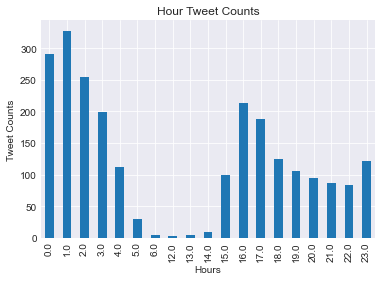

In [157]:
# This code stores the number of retweets in a dictionary. Keys are the hours and
hours = df.tweet_hour
hour_count = Counter(hours)
df_hours = pd.DataFrame.from_dict(hour_count, orient='index')
df_hours = df_hours.sort_index()
df_hours.plot(kind='bar', legend=False)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Hours')
plt.ylabel('Tweet Counts')
plt.title('Hour Tweet Counts')
plt.savefig('hour_count.png', bbox_inches="tight")
plt.show();

* **This visualization shows that the page owner tweets the most from 12 a.m. to 3 a.m.** 
* **His activity drops significantly after that; he rarely tweets from 6 a.m. to 2 p.m.**
* **He also tweets from 3 p.m. to 11 p.m. (lower activity level)**

**Note: This distribution is bimodal with two peeks: the owner during his day mostly tweets around 4 p.m. and during his night, he mostly tweets around 1 a.m.**

### What platform for releasing tweets does the owner prefer the most?

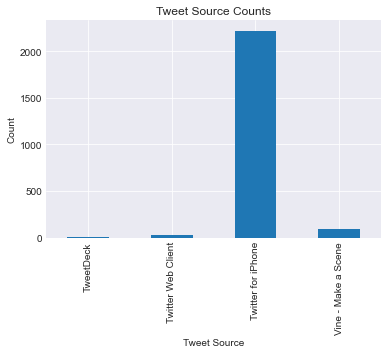

In [262]:
source = df.source
source_count = Counter(source)
source_count = pd.DataFrame.from_dict(source_count, orient='index')
source_count = source_count.sort_index()
source_count.plot(kind='bar', legend=False)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Tweet Source')
plt.ylabel('Count')
plt.title('Tweet Source Counts')
plt.savefig('source_count.png', bbox_inches="tight")
plt.show();

**We notice that the page owner usually tweets from his iPhone**

### What is the most common dog type?

In [249]:
df.dog_type.value_counts().head(15)

Nan                         324
Golden_Retriever            172
Labrador_Retriever          113
Pembroke                     96
Chihuahua                    95
Pug                          65
Toy_Poodle                   52
Chow                         51
Samoyed                      46
Pomeranian                   42
Malamute                     34
Cocker_Spaniel               34
French_Bulldog               32
Chesapeake_Bay_Retriever     31
Miniature_Pinscher           26
Name: dog_type, dtype: int64

**The most common type is the Golden Retriever**

### What is the most common dog name?

In [250]:
df.dog_name.value_counts().head(10)

None       854
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Tucker      10
Penny       10
Winston      9
Bo           9
Name: dog_name, dtype: int64

**Charlie is the most common dog name; less common names are repeated 11 times, 10 times, 9 times, and 8 times. They are 'Charlie', 'Oliver', 'Lucy', 'Cooper', 'Lola', 'Tucker', 'Penny', and so on.**

### How many dog types does the tweets cover/have?

In [255]:
print("There are {} different dog types in the tweets, because 'NaN' is counted as one type.".format(len(df.dog_type.unique()) - 1))

There are 114 different dog types in the tweets, because 'NaN' is counted as one type.
